# Data Cleaning and Exploratory Data Analysis

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('./data/infatuation_reviews_new.csv', lineterminator = '\n')

In [50]:
df.head(20)

,address,cost,cuisine,name,rating,review
0,"\n2750 Broadway\nNew York, NY 10025\n(212) 510...",2.0,Pizza,Mama’s Too,8.3,A typical NYC slice shop has a few basic eleme...
1,"\n14 Christopher St\nNew York, NY 10014\n(212)...",4.0,Japanese,Omakase Room By Tatsu,7.7,Tolerance for group trips can vary widely. Som...
2,"\n428 Greenwich St.\nNew York, NY 10013\n212-2...",4.0,Japanese,Sushi Azabu,8.5,When the apocalypse eventually comes for New Y...
3,"\n264 Clinton St\nNew York, NY 11201\n(347) 98...",3.0,Seafood,Saint Julivert Fisherie,7.7,"When you’re young, you don’t have to think muc..."
4,"\n498 9th Ave\nNew York, NY 10018\n(646) 863-2...",2.0,Russian,Farida,8.0,"There’s a bleak, sweaty place on 34th Street w..."
5,"\n541-B Myrtle Avenue\nNew York, NY 11205\n(71...",2.0,Sushi,U-Gu,7.7,New York is near an ocean with plenty of free ...
6,"\n324 Lafayette St.\nNew York, NY 10012\n212-3...",3.0,Spanish,Gato,7.3,"When some things change, they become unrecogni..."
7,"\n15 W 18th St\nNew York, NY 10011\n",3.0,Greek,Kyma,7.3,"Around the time Kyma opened, we heard that Bil..."
8,"\nEast 75th street\nNew York, NY 10021\n(212) ...",3.0,Bar Food,2nd Floor Bar & Essen,7.9,We have mixed feelings toward secret places. O...
9,"\n495 Lorimer St\nNew York, NY 11211\n(718) 59...",1.0,Middle Eastern,Samesa,8.1,Casual weeknight dinners are rarely memorable....


## Cleaning and EDA Plan of Action
In order to create a useful dataframe that I can use to build a predictive model and a recommendation system, I need to do several things:
1. Get rid of null values
2. Separate addresses out into a new column
3. Add a borough column

In [4]:
df.columns

Index(['address', 'cost', 'cuisine', 'name', 'rating', 'review'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 6 columns):
address    825 non-null object
cost       824 non-null float64
cuisine    819 non-null object
name       825 non-null object
rating     825 non-null float64
review     825 non-null object
dtypes: float64(2), object(4)
memory usage: 38.8+ KB


There are 6 entries without a `cuisine` column, so we can try to impute these through reading the reviews online. We will drop Goat Town as it is closed. Then the restaurants are:

|  Index | Restaurant  | Cuisine  |
|--------|-------------|----------|
| 630    |Bowery Diner | Diner    |
| 731    |Wildwood Barbeque| BBQ  | 
| 789    |Little Giant | American |
| 797    |Pinche Taqueria | Mexican |
| 805    |Mole   | Mexican |
<br><br>
Additionally, there is one cost that has a null value - Blossom Du Jour and an index of 427.

In [76]:
df[df['cost'].isnull()]

,address,cost,cuisine,name,rating,review
427,"\n165 Amsterdam Ave.\nNew York, NY 10023\n212-...",NaN,Sandwiches,Blossom Du Jour,7.2,We at The Infatuation are equal opportunity fo...


#### Drop Goat Town and reset index

In [70]:
df[df['cuisine'].isnull()]

,address,cost,cuisine,name,rating,review
731,"\n225 Park Ave. S.\nNew York, NY 10003\n212-53...",3.0,NaN,Wildwood Barbecue,2.1,The subway during summer. The current season o...
789,"\n85 Orchard St.\nNew York, NY 10002\n212-226-...",3.0,NaN,Little Giant,6.3,I hear such great things about Little Giant th...
797,"\n227 Mott St.\nNew York, NY 10012\n212-625-00...",1.0,NaN,Pinche Taqueria,7.0,In a city where Chipotle dominates the cheap M...
805,"\n205 Allen St.\nNew York, NY 10002\n212-777-3...",3.0,NaN,Mole,6.0,There isn't much in the way of Mexican to choo...


In [59]:
df.drop(699, axis = 0, inplace = True)
df.reset_index(drop=True, inplace = True)
df.tail()

,address,cost,cuisine,name,rating,review
819,"\n96 Second Ave.\nNew York, NY 10003\n212-674-...",3.0,Seafood,The Mermaid Inn,7.7,The Mermaid Inn...this place has been a staple...
820,"\n128 E. 7th St.\nNew York, NY 10009\n212-473-...",3.0,Greek,Pylos,7.6,"Greek food is great, but it's just not somethi..."
821,"\n94 Prince St.\nNew York, NY 10012\n212-226-9...",1.0,American,Fanelli Cafe,6.9,Fanelli Cafe is one of those New York City gem...
822,"\n90 Bedford St.\nNew York, NY 10014\n212-741-...",3.0,American,Little Owl,7.5,"Little Owl, I want to love you. I really do. W..."
823,"\n30 W. 26th St.\nNew York, NY 10010\n212-255-...",2.0,BBQ,Hill Country,7.5,Love getting dirty on some BBQ? You'll love Hi...


Create an `impute_nulls` function that works on multiple columns

In [64]:
def impute_nulls(df, ind, col, val):
    df.loc[ind, col] = val

In [71]:
impute_nulls(df, 731, 'cuisine','BBQ')

In [72]:
df.loc[731]

address    \n225 Park Ave. S.\nNew York, NY 10003\n212-53...
cost                                                       3
cuisine                                                  BBQ
name                                       Wildwood Barbecue
rating                                                   2.1
review     The subway during summer. The current season o...
Name: 731, dtype: object

In [73]:
impute_nulls(df, 789, 'cuisine', 'American')
impute_nulls(df, 797, 'cuisine', 'Mexican')
impute_nulls(df, 805, 'cuisine', 'Mexican')

In [74]:
#Check for nulls now
df[df['cuisine'].isnull()]

,address,cost,cuisine,name,rating,review


Because the average for Sandwich restaurants is 2.0 and on Yelp the cost for this restaurant is 2, I will use 2 as the value.

In [77]:
#impute cost value for Blossom Du Jour - index, 427
impute_nulls(df, 427, 'cost', 2.0)

In [78]:
df.isnull().sum().sum()

0

### Clean up address column
Because some of the addresses also include a phone number, I decided to split on the '\n' and create a new address column to use that only takes the 1 and 2 indexed strings after the split, and then recombine the strings.

In [49]:
df.address[1].split('\n')

['', '14 Christopher St', 'New York, NY 10014', '(212) 367-2067', '']

In [79]:
trial = df['address'][0].split('\n')[1:3]

In [80]:
trial

['2750 Broadway', 'New York, NY 10025']

In [83]:
trial[0] + ', ' + trial[1]

'2750 Broadway, New York, NY 10025'

In [85]:
#Create a new column: address only
#df['address_only'] = ''

#
df['address_only'] = df['address'].map(lambda x: x.split('\n')[1:3])

In [86]:
df.columns

Index(['address', 'cost', 'cuisine', 'name', 'rating', 'review',
       'address_only'],
      dtype='object')

In [91]:
df['address_only'] = df['address_only'].map(lambda x: x[0] + ', ' + x[1])

In [92]:
df['address_only'][0]

'2750 Broadway, New York, NY 10025'

Create new .csv file

In [ ]:
df.to_csv('./cleaned_reviews.csv', index = False)

In [ ]:
df.head()

### Classify each restaurant as a borough

Create list of zip codes for each borough

In [122]:
bronx_zips = [10453, 10457, 10460, 10458, 10467,
              10468, 10451, 10452, 10456, 10454, 
              10455, 10459, 10474, 10463, 10471,
              10466, 10469, 10470, 10475, 10461, 
              10462, 10464, 10465, 10472, 10473]

brooklyn_zips = [11212, 11213, 11216, 11233, 11238, 11249,
                 11209, 11214, 11228, 11204, 11218, 
                 11219, 11230, 11234, 11236, 11239, 
                 11223, 11224, 11229, 11235, 11201, 
                 11205, 11215, 11217, 11231, 11203, 
                 11210, 11225, 11226, 11207, 11208, 
                 11211, 11222, 11220, 11232, 11206, 11221, 11237]

queens_zips = [11361, 11362, 11363, 11364, 11354, 
               11355, 11356, 11357, 11358, 11359, 11360,
               11365, 11366, 11367,
               11412, 11423, 11432, 11433, 11434, 11435, 11436,
               11101, 11102, 11103, 11104, 11105, 11106,
               11374, 11375, 11379, 11385, 11691, 11692, 11693, 11694, 11695, 11697,
               11004, 11005, 11411, 11413, 11422, 11426, 11427, 11428, 11429,
               11414, 11415, 11416, 11417, 11418, 11419, 11420, 11421,
               11368, 11369, 11370, 11372, 11373, 11377, 11378]

manhattan_zips = [10026, 10027, 10030, 10037, 10039, 
                  10001, 10011, 10018, 10019, 10020, 10036,
                  10029, 10035, 10010, 10016, 10017, 10022,
                  10012, 10013, 10014, 10282, 10080,
                  10004, 10005, 10006, 10007, 10038, 10280,
                  10002, 10003, 10009, 10021, 10028, 10044, 10065, 10075, 10128,
                  10023, 10024, 10025, 10031, 10032, 10033, 10034, 10040]

staten_island_zips = [10302, 10303, 10310, 
                      10306, 10307, 10308, 10309, 10312,
                      10301, 10304, 10305, 10314]

jersey_zips = ['07382', '07302']
upstate_zips = '10591'

Convert every zip code into a string

In [123]:
manhattan_zips = [str(z) for z in manhattan_zips]
brooklyn_zips = [str(z) for z in brooklyn_zips]
bronx_zips = [str(z) for z in bronx_zips]
queens_zips = [str(z) for z in queens_zips]
staten_island_zips = [str(z) for z in staten_island_zips]

In [124]:
manhattan_zips[0]

'10026'

Create a column of zip codes and of boroughs

In [125]:
df['rest_borough'] = '0'

In [126]:
df['rest_zip_code'] = '0'

In [127]:
df.head()

,address,cost,cuisine,name,rating,review,address_only,rest_borough,rest_zip_code
0,"\n2750 Broadway\nNew York, NY 10025\n(212) 510...",2.0,Pizza,Mama’s Too,8.3,A typical NYC slice shop has a few basic eleme...,"2750 Broadway, New York, NY 10025",0,0
1,"\n14 Christopher St\nNew York, NY 10014\n(212)...",4.0,Japanese,Omakase Room By Tatsu,7.7,Tolerance for group trips can vary widely. Som...,"14 Christopher St, New York, NY 10014",0,0
2,"\n428 Greenwich St.\nNew York, NY 10013\n212-2...",4.0,Japanese,Sushi Azabu,8.5,When the apocalypse eventually comes for New Y...,"428 Greenwich St., New York, NY 10013",0,0
3,"\n264 Clinton St\nNew York, NY 11201\n(347) 98...",3.0,Seafood,Saint Julivert Fisherie,7.7,"When you’re young, you don’t have to think muc...","264 Clinton St, New York, NY 11201",0,0
4,"\n498 9th Ave\nNew York, NY 10018\n(646) 863-2...",2.0,Russian,Farida,8.0,"There’s a bleak, sweaty place on 34th Street w...","498 9th Ave, New York, NY 10018",0,0


In [128]:
#boroughs = []
for i, x in enumerate(df['address_only']):
    for z in brooklyn_zips:
        #print(i, x, z)
        if z in x:
            df.loc[i, 'rest_borough'] = 'Brooklyn'
            df.loc[i, 'rest_zip_code'] = z
    for z in manhattan_zips:
        if z in x:
            df.loc[i, 'rest_borough'] = 'Manhattan'
            df.loc[i, 'rest_zip_code'] = z
    for z in queens_zips:
        if z in x:
            df.loc[i, 'rest_borough'] = 'Queens'
            df.loc[i, 'rest_zip_code'] = z
    for z in bronx_zips:
        if z in x:
            df.loc[i, 'rest_borough'] = 'Bronx'
            df.loc[i, 'rest_zip_code'] = z
    for z in staten_island_zips:
        if z in x:
            df.loc[i, 'rest_borough'] = 'Staten Island'
            df.loc[i, 'rest_zip_code'] = z
    for z in jersey_zips:
        if z in x:
            df.loc[i, 'rest_borough'] = 'Jersey City'
            df.loc[i, 'rest_zip_code'] = z
    if upstate_zips in x:
        df.loc[i, 'rest_borough'] = 'Westchester'
        df.loc[i, 'rest_zip_code'] = upstate_zips

While it looks like there are no null values for all the columns, I actually set the column to all be equal to 0, therefore, if there was no zip code match for the zip code, the values remained '0'. A `df['address_only'].value_counts()` will give a better understanding for any restaurants that may have been skipped.

In [129]:
df['rest_borough'].value_counts()

Manhattan        614
Brooklyn         171
Queens            17
0                 16
Staten Island      3
Bronx              1
Jersey City        1
Westchester        1
Name: rest_borough, dtype: int64

In [130]:
df['rest_zip_code'].value_counts()

10014    78
10003    72
10012    71
10002    51
11211    51
10013    46
10011    43
10009    43
10019    31
10010    21
11222    20
11238    19
10022    17
10001    17
0        16
10016    15
10021    14
10024    14
11215    13
11231    13
10036    12
11217    12
10023    10
11101     9
11237     9
10065     9
11201     7
11206     7
10018     7
10017     6
         ..
10005     2
10128     2
10025     2
11103     2
11105     1
11226     1
10302     1
11224     1
10020     1
10282     1
11209     1
10080     1
11218     1
10031     1
11223     1
11102     1
10280     1
11232     1
11693     1
11225     1
10314     1
11385     1
07302     1
10035     1
11230     1
11414     1
10454     1
10305     1
10591     1
11104     1
Name: rest_zip_code, Length: 70, dtype: int64

Above, it is clear that there are 16 `'0'` values for `rest_borough`. This is also the case for `rest_zip_code`. 

In [131]:
df[df['rest_borough'] == '0']

,address,cost,cuisine,name,rating,review,address_only,rest_borough,rest_zip_code
100,"\n211 Dekalb Ave\nBrooklyn, NY \n929-298-0209\n",3.0,Mediterranean,Evelina,7.9,There are certain situations where the quality...,"211 Dekalb Ave, Brooklyn, NY",0,0
154,"\n2315 Broadway\nNew York, NY \n(212) 496-9100\n",3.0,American,Maison Pickle,6.1,Have we been too hard on the Upper West Side?\...,"2315 Broadway, New York, NY",0,0
222,"\n289 5th Ave\nBrooklyn, NY \n(718) 499-2424\n",2.0,American,Gristmill,7.8,Dustin from Stranger Things. Your sixth-grade ...,"289 5th Ave, Brooklyn, NY",0,0
317,"\n119 1st Ave.\nNew York, NY \n646-767-9050\n",3.0,Korean,Oiji,8.5,"Before we begin, let’s get one thing out of th...","119 1st Ave., New York, NY",0,0
395,"\n2893 Broadway\nNew York, NY \n212-665-2800\n",3.0,American,Community Food & Juice,7.6,Michelle and Malia Obama had lunch at Communit...,"2893 Broadway, New York, NY",0,0
408,"\n151 Elizabeth St.\nNew York, NY \n646-666-08...",1.0,American,Egg Shop,7.6,This review has been a long time coming. Not b...,"151 Elizabeth St., New York, NY",0,0
431,"\n2357 Arthur Ave.\nNew York, NY \n718-220-1027\n",3.0,Italian,Zero Otto Nove,8.2,You know you're at the right place when you se...,"2357 Arthur Ave., New York, NY",0,0
449,"\n219 Dekalb Ave.\nBrooklyn, NY \n347-689-4287\n",3.0,Latin,Colonia Verde,6.0,A friend once set me up with this guy who was ...,"219 Dekalb Ave., Brooklyn, NY",0,0
479,"\n307 Smith St.\nBrooklyn, NY \n718-855-2490\n",2.0,Mexican,Bar San Miguel,7.6,"Here's a tip for you. Jim Cramer (yes, that Ji...","307 Smith St., Brooklyn, NY",0,0
485,"\n430 Lafayette St.\nNew York, NY \n212-505-51...",3.0,Fusion,Indochine,7.3,Is complaining about Fashion Week your favorit...,"430 Lafayette St., New York, NY",0,0


Inspection of the 16 restaurants with no borough or zipcode value shows that there were actually no zip codes entered for these restaurants. Right now, we will input the zip codes manually.

In [135]:
df.loc[100, 'address'] + '11205'

'\n211 Dekalb Ave\nBrooklyn, NY \n929-298-0209\n11205'

In [139]:
df.loc[100, 'address_only'] = df.loc[100, 'address_only'] + '11205'
df.loc[154, 'address_only'] = df.loc[154, 'address_only'] + '10024'
df.loc[222, 'address_only'] = df.loc[222, 'address_only'] + '11215'
df.loc[317, 'address_only'] = df.loc[317, 'address_only'] + '10003'
df.loc[395, 'address_only'] = df.loc[395, 'address_only'] + '10025'
df.loc[408, 'address_only'] = df.loc[408, 'address_only'] + '10012'
df.loc[431, 'address_only'] = df.loc[431, 'address_only'] + '10458'
df.loc[449, 'address_only'] = df.loc[449, 'address_only'] + '11205'
df.loc[479, 'address_only'] = df.loc[479, 'address_only'] + '11231'
df.loc[485, 'address_only'] = df.loc[485, 'address_only'] + '10003'
df.loc[486, 'address_only'] = df.loc[486, 'address_only'] + '10002'
df.loc[487, 'address_only'] = df.loc[487, 'address_only'] + '11235'
df.loc[559, 'address_only'] = df.loc[559, 'address_only'] + '10027'
df.loc[564, 'address_only'] = df.loc[564, 'address_only'] + '10027'
df.loc[584, 'address_only'] = df.loc[584, 'address_only'] + '11211'
df.loc[610, 'address_only'] = df.loc[610, 'address_only'] + '10002'

In [140]:
#Run the loop again to fill in values
#boroughs = []
for i, x in enumerate(df['address_only']):
    for z in brooklyn_zips:
        #print(i, x, z)
        if z in x:
            df.loc[i, 'rest_borough'] = 'Brooklyn'
            df.loc[i, 'rest_zip_code'] = z
    for z in manhattan_zips:
        if z in x:
            df.loc[i, 'rest_borough'] = 'Manhattan'
            df.loc[i, 'rest_zip_code'] = z
    for z in queens_zips:
        if z in x:
            df.loc[i, 'rest_borough'] = 'Queens'
            df.loc[i, 'rest_zip_code'] = z
    for z in bronx_zips:
        if z in x:
            df.loc[i, 'rest_borough'] = 'Bronx'
            df.loc[i, 'rest_zip_code'] = z
    for z in staten_island_zips:
        if z in x:
            df.loc[i, 'rest_borough'] = 'Staten Island'
            df.loc[i, 'rest_zip_code'] = z
    for z in jersey_zips:
        if z in x:
            df.loc[i, 'rest_borough'] = 'Jersey City'
            df.loc[i, 'rest_zip_code'] = z
    if upstate_zips in x:
        df.loc[i, 'rest_borough'] = 'Westchester'
        df.loc[i, 'rest_zip_code'] = upstate_zips

In [147]:
df['rest_borough'].value_counts(normalize = True)

Manhattan        0.756068
Brooklyn         0.214806
Queens           0.020631
Staten Island    0.003641
Bronx            0.002427
Jersey City      0.001214
Westchester      0.001214
Name: rest_borough, dtype: float64

In [142]:
df[(df['rest_borough'] == '0') & (df['rest_zip_code'] == '0')]

,address,cost,cuisine,name,rating,review,address_only,rest_borough,rest_zip_code


### Save dataframe as is

In [180]:
df.to_csv('./Data/reviews_for_model.csv', index=False)

## Create visualizations

In [168]:
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

#change_width(ax, .35)

In [ ]:
ax.patches

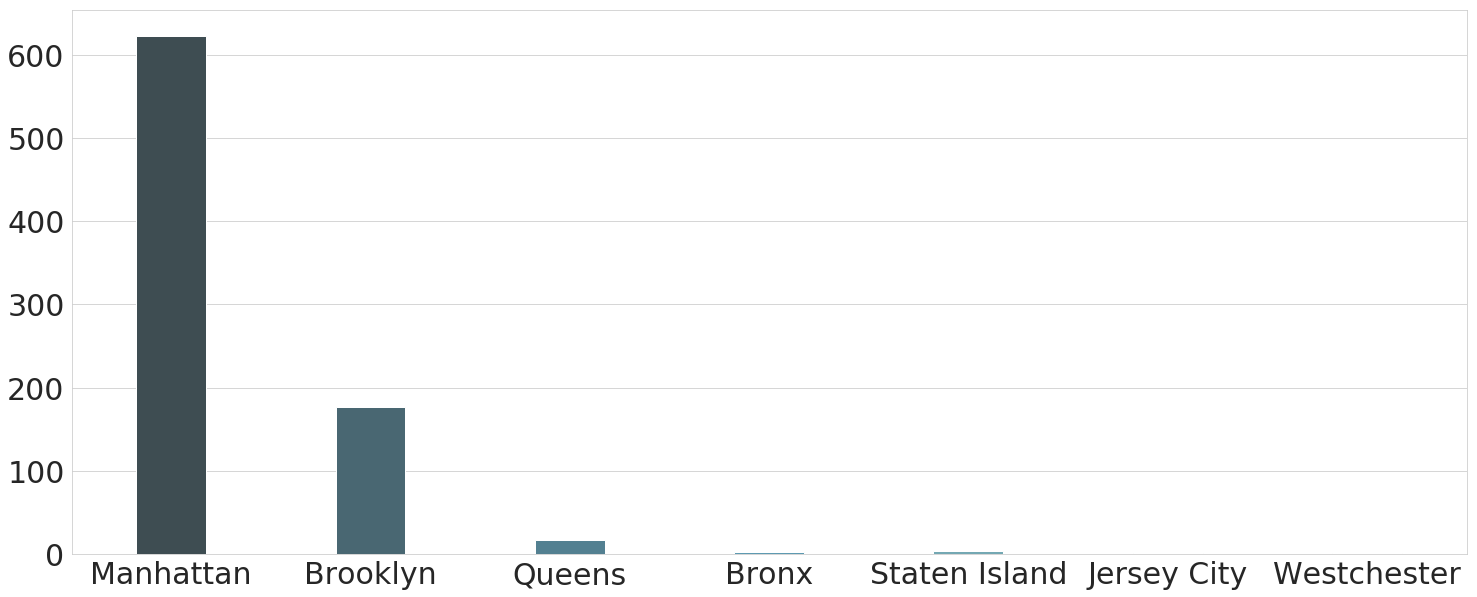

In [153]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize = (25, 10))
sns.countplot(x = df['rest_borough'], ax = ax, palette = "GnBu_d", saturation = 0.6)
change_width(ax, .35)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.xlabel('')
plt.ylabel('');
#plt.show()

In [183]:
df['cuisine'].value_counts()

American             218
Japanese              67
Italian               56
Pizza                 44
French                42
Mexican               41
Bar Food              34
Seafood               33
Pasta                 24
Chinese               21
Mediterranean         19
Spanish               16
Korean                15
Sandwiches            14
BBQ                   13
Burgers               13
Diner                 13
Latin                 12
Tacos                 10
Sushi                 10
Ramen                  8
Thai                   8
Vegetarian             8
Greek                  8
Steaks                 7
Vietnamese             7
Fusion                 7
Wine Bar               6
Indian                 5
Middle Eastern         5
Russian                3
Malaysian              3
Jamaican               3
Cafe/Bakery            3
Raw Bar                2
Southern               2
Australian             2
Tex-Mex                2
East Village           2
Fast Food              2


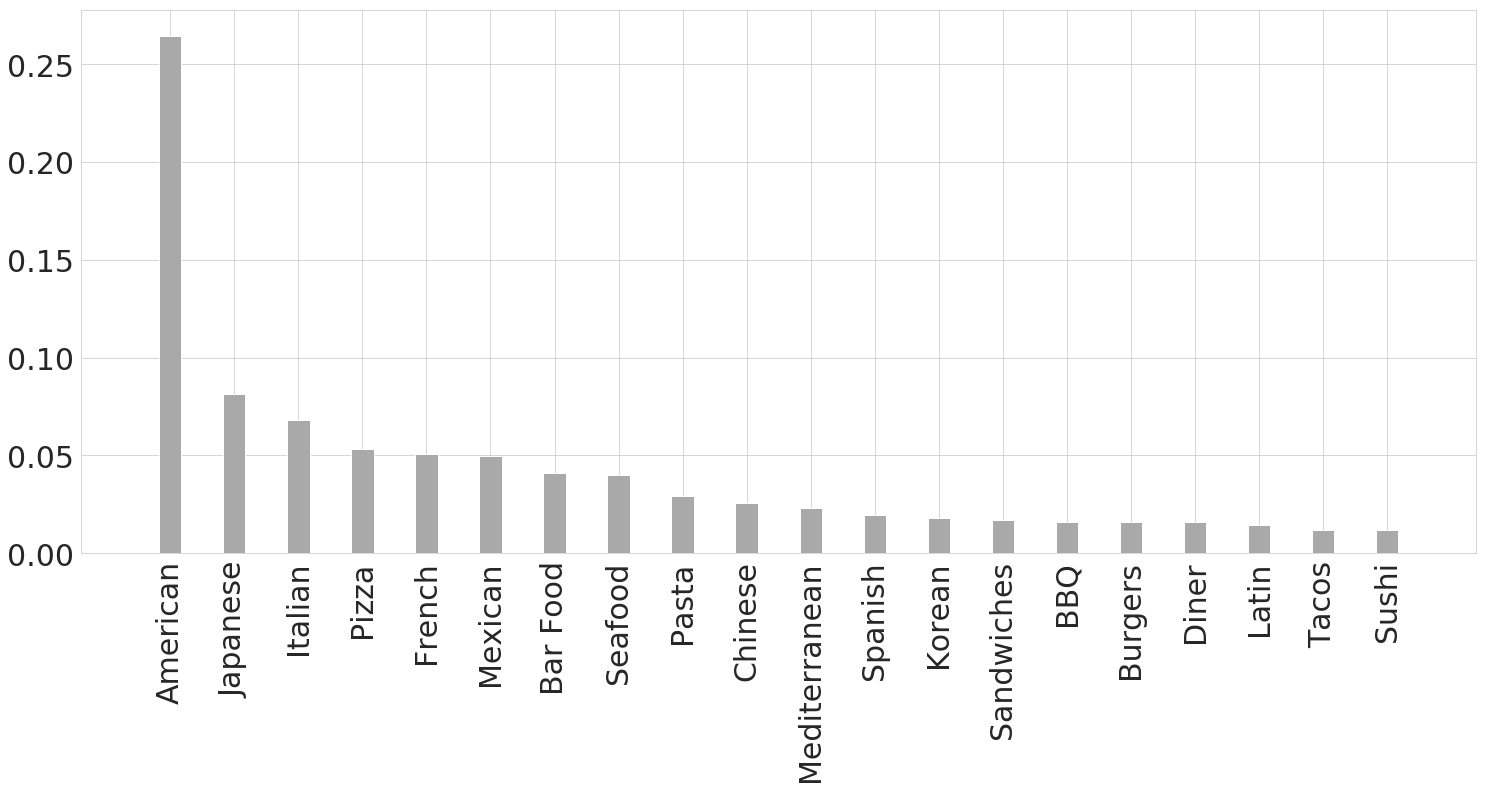

In [152]:


sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize = (25, 10))
plt.bar(df['cuisine'].value_counts(normalize = True).head(20).index, df['cuisine'].value_counts(normalize = True).head(20).values, color = 'darkgrey')
change_width(ax, .35)
plt.xticks(fontsize = 30, rotation = 90)
plt.yticks(fontsize = 30)
plt.xlabel('')
plt.ylabel('');
#plt.show()

#### Distribution of Ratings

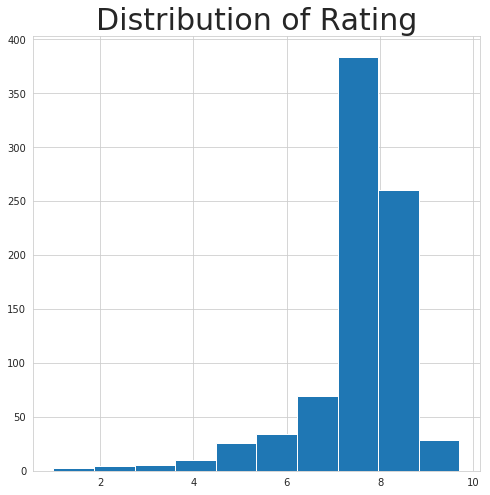

In [164]:
plt.figure(figsize = (8, 8))

plt.hist(df['rating'])
plt.title('Distribution of Rating', fontsize = 30);

#### Distribution of Costs

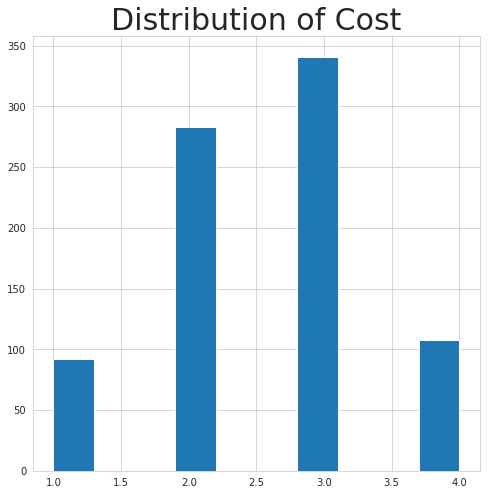

In [162]:
plt.figure(figsize = (8, 8))

plt.hist(df['cost'])
plt.title('Distribution of Cost', fontsize=30);

#### Correlation of Rating with Cost

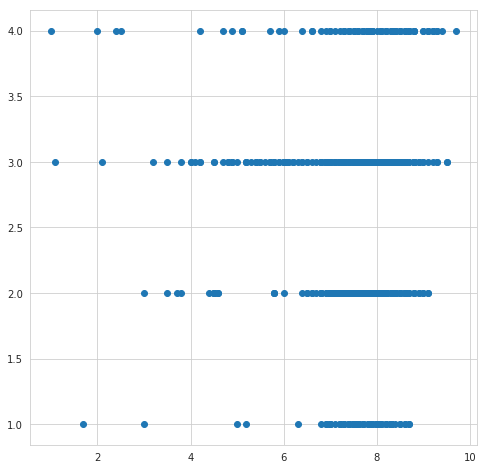

In [167]:
plt.figure(figsize = (8, 8))

plt.scatter(df['rating'], df['cost'])

#### Average rating for each top 20 cuisine

(array([ 1.,  1.,  1.,  1.,  7.,  9., 22., 91., 74., 11.]),
 array([1.  , 1.87, 2.74, 3.61, 4.48, 5.35, 6.22, 7.09, 7.96, 8.83, 9.7 ]),
 <a list of 10 Patch objects>)

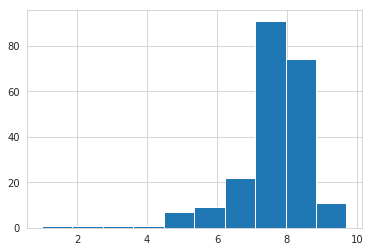

In [172]:
plt.hist(df[df['cuisine'] == 'American']['rating']);

In [175]:
top_20_cuis = list(df['cuisine'].value_counts().head(20).index)

In [176]:
top_20_cuis

['American',
 'Japanese',
 'Italian',
 'Pizza',
 'French',
 'Mexican',
 'Bar Food',
 'Seafood',
 'Pasta',
 'Chinese',
 'Mediterranean',
 'Spanish',
 'Korean',
 'Sandwiches',
 'BBQ',
 'Burgers',
 'Diner',
 'Latin',
 'Tacos',
 'Sushi']

### Combining the dataframes

In [185]:
tfidf = pd.read_csv('./Data/tfidf_df.csv')

In [188]:
keyword = pd.read_csv('./Data/full_data_with_lat_long.csv')

In [189]:
keyword.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 17 columns):
Document_No           824 non-null int64
Dominant_Topic        824 non-null float64
Topic_Perc_Contrib    824 non-null float64
Keywords              824 non-null object
Text                  824 non-null object
rest_cost             824 non-null float64
cuisine_type          824 non-null object
rest_name             824 non-null object
rest_rating           824 non-null float64
rest_review           824 non-null object
address_only          824 non-null object
rest_borough          824 non-null object
rest_zip_code         824 non-null int64
lemmatized            824 non-null object
lat_long              824 non-null object
lat                   824 non-null object
long                  824 non-null object
dtypes: float64(4), int64(2), object(11)
memory usage: 109.5+ KB


In [190]:
tfidf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Columns: 12270 entries, rest_cost to rest_borough_Westchester
dtypes: float64(12206), int64(62), object(2)
memory usage: 77.1+ MB


In [192]:
recommender_final_df = pd.concat([tfidf, keyword[['Dominant_Topic']]], axis=1)

In [194]:
recommender_final_df= pd.get_dummies(recommender_final_df, columns=['Dominant_Topic'], drop_first=True)

In [196]:
recommender_final_df.to_csv('./Data/recommender_final_df.csv', index=False)